# Try 1

In [1]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense,Input
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
# 데이터 모두 합친 파일 가져오기 
filenames = os.listdir('../data/total2/')
filenames

['01_hagye1.csv',
 '02_sanggye2.csv',
 '03_gyonam.csv',
 '04_sanggye10.csv',
 '05_sanggye5.csv',
 '06_sanggye2.csv',
 '07_sanggye67.csv',
 '08_sanggye1.csv',
 '09_sanggye67.csv',
 '10_jongno1234.csv',
 '11_jongno1234.csv',
 '12_jongno1234.csv',
 '13_jongno1234.csv',
 '14_jongno1234.csv',
 '15_jongno1234.csv',
 '16_jongno1234.csv',
 '17_hagye1.csv',
 '18_sanggye2.csv',
 '19_gongneung1.csv',
 '20_gongneung1.csv',
 '21_gongneung2.csv',
 '22_wolgye3.csv',
 '23_junggye23.csv',
 '24_sanggye2.csv',
 '25_sanggye5.csv',
 '26_sanggye67.csv',
 '27_jongno1234.csv',
 '28_sanggye34.csv',
 '29_changsin1.csv',
 '30_buam.csv',
 '31_sajik.csv',
 '32_jongno1234.csv',
 '33_changsin1.csv',
 '34_wolgye1.csv',
 '35_changsin3.csv',
 '36_cheongunhyoja.csv',
 '37_pyeongchang.csv',
 '38_hyehwa.csv',
 '39_gahoe.csv',
 '40_jongno56.csv',
 '41_hyehwa.csv',
 '42_gongneung2.csv',
 '43_ihwa.csv',
 '44_jongno1234.csv',
 '45_gahoe.csv',
 '46_gahoe.csv',
 '47_jongno1234.csv',
 '48_sungin2.csv',
 '49_jongno1234.csv',
 '50

In [3]:
# 빈 리스트 만들기
totaldata2 = []

# for문 돌려서 각 파일 불러온 후 리스트에 append
for name in filenames:
    totaldata2.append(pd.read_csv('../data/total2/'+name))

# 최종적으로 concat
rawdata = pd.concat(totaldata2)
rawdata

,Date,search,pm10,pm25,COUNT_T,TMST,retail
0,20180507,0.04172,96.467,43.400,101.0,3805.420,1.273
1,20180510,0.04172,67.648,31.915,244.0,4258.262,1.216
2,20180511,0.04172,110.924,71.296,192.0,4276.178,1.306
3,20180512,0.04172,39.515,24.293,56.0,3445.193,1.229
4,20180513,0.06258,20.664,12.441,130.0,3258.588,1.382
5,20180514,0.06258,92.687,65.110,313.0,3981.379,1.282
6,20180515,0.06258,87.309,61.238,273.0,4193.862,1.516
7,20180516,0.06258,41.908,27.438,228.0,4019.172,1.233
8,20180517,0.06258,18.190,7.539,185.0,4000.379,1.253
9,20180518,0.06258,10.677,3.328,107.0,4224.568,1.327


In [4]:
# 정규화
rawdata = (rawdata-rawdata.mean())/rawdata.std()

In [5]:
# x_feature와 y_feature 값 설정 
x1 = rawdata[['pm10','pm25','COUNT_T','TMST']]
y1 =  rawdata['retail']
x_data1 = np.array(x1)
y_data1 = np.array(y1)
y_data1 = y_data1.reshape(-1, 1)
y_data1 = y_data1
x_data1 = x_data1

In [6]:
# session 클리어
K.clear_session()

# 모델 만들기
model1 = Sequential()
model1.add(Dense(input_dim=4, units=1, activation="linear"))

W0907 16:33:59.256156 17960 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0907 16:33:59.269500 17960 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0907 16:33:59.271494 17960 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 16:33:59.272491 17960 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0907 16:33:59.274487 17960 deprecation_wrapper.py:119] From C:\Anaconda3\l

In [8]:
# 모델 학습
model1.compile(optimizer='adam', loss='mse')
model1.fit(x_data1,y_data1,batch_size=300, epochs=1000, verbose=1)

Epoch 1/1000
14404/14404 [==============================] - 0s 9us/step - loss: 0.4323
Epoch 2/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4321
Epoch 3/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 4/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 5/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 6/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 7/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 8/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 9/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 10/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 11/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 12/1000
14404/14404 [==============

14404/14404 [==============================] - 0s 2us/step - loss: 0.4326
Epoch 187/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 188/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 189/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 190/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4321
Epoch 191/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 192/1000
14404/14404 [==============================] - 0s 6us/step - loss: 0.4322
Epoch 193/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 194/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 195/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4321
Epoch 196/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 197/1000
14404/14404 [========

Epoch 278/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 279/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4323
Epoch 280/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 281/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4321
Epoch 282/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4321
Epoch 283/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 284/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4321
Epoch 285/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4323
Epoch 286/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 287/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 288/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4321
Epoch 289/1000
14404/

14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 371/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 372/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 373/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 374/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 375/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 376/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 377/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 378/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4323
Epoch 379/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 380/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 381/1000
14404/14404 [========

14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 555/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 556/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 557/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 558/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4323
Epoch 559/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 560/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4325
Epoch 561/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 562/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 563/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 564/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 565/1000
14404/14404 [========

14404/14404 [==============================] - 0s 3us/step - loss: 0.4323
Epoch 739/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 740/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 741/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4326
Epoch 742/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4323
Epoch 743/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 744/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 745/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 746/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 747/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4321
Epoch 748/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 749/1000
14404/14404 [========

Epoch 922/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 923/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4323
Epoch 924/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4323
Epoch 925/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 926/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 927/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4323
Epoch 928/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 929/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 930/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4323
Epoch 931/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4322
Epoch 932/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4322
Epoch 933/1000
14404/

In [9]:
# 인덱스 도출
model1.predict(x_data1)

array([[-0.34406087],
       [-0.4670449 ],
       [-0.35541427],
       ...,
       [-0.7020627 ],
       [-0.5838257 ],
       [-0.7901033 ]], dtype=float32)

In [10]:
rawdata['Linearindex1'] = model1.predict(x_data1)
rawdata1 = rawdata[['pm10','pm25','COUNT_T','TMST','retail','Linearindex1']]
rawdata1

,pm10,pm25,COUNT_T,TMST,retail,Linearindex1
0,1.067992,0.426393,-0.634053,-0.587751,0.157128,-0.344061
1,0.317234,-0.005862,0.324030,-0.539979,0.014601,-0.467045
2,1.444609,1.476300,-0.024364,-0.538089,0.239643,-0.355414
3,-0.415653,-0.292727,-0.935547,-0.625753,0.047107,-0.328200
4,-0.906737,-0.738795,-0.439756,-0.645439,0.429678,-0.434770
5,0.969520,1.243480,0.786321,-0.569189,0.179632,-0.509353
6,0.829419,1.097752,0.518326,-0.546773,0.764741,-0.454537
7,-0.353313,-0.174361,0.216832,-0.565202,0.057109,-0.461875
8,-0.971186,-0.923289,-0.071263,-0.567184,0.107118,-0.443826
9,-1.166906,-1.081776,-0.593854,-0.543533,0.292153,-0.346828


In [11]:
# 직관적 분석을 위해 (-1) 곱하기 : 미세먼지와 인덱스를 양의 상관관계로 만드는 작업
rawdata1['Linearindex1'] = rawdata1['Linearindex1'] * (-1)
rawdata1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pm10,pm25,COUNT_T,TMST,retail,Linearindex1
0,1.067992,0.426393,-0.634053,-0.587751,0.157128,0.344061
1,0.317234,-0.005862,0.324030,-0.539979,0.014601,0.467045
2,1.444609,1.476300,-0.024364,-0.538089,0.239643,0.355414
3,-0.415653,-0.292727,-0.935547,-0.625753,0.047107,0.328200
4,-0.906737,-0.738795,-0.439756,-0.645439,0.429678,0.434770
5,0.969520,1.243480,0.786321,-0.569189,0.179632,0.509353
6,0.829419,1.097752,0.518326,-0.546773,0.764741,0.454537
7,-0.353313,-0.174361,0.216832,-0.565202,0.057109,0.461875
8,-0.971186,-0.923289,-0.071263,-0.567184,0.107118,0.443826
9,-1.166906,-1.081776,-0.593854,-0.543533,0.292153,0.346828


In [12]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,COUNT_T,TMST,retail,Linearindex1
pm10,1.000000,0.942492,0.601118,-0.067030,-0.119640,0.156961
pm25,0.942492,1.000000,0.561144,-0.049735,-0.095586,0.125248
COUNT_T,0.601118,0.561144,1.000000,0.045397,-0.111842,0.145274
TMST,-0.067030,-0.049735,0.045397,1.000000,0.738820,-0.981022
retail,-0.119640,-0.095586,-0.111842,0.738820,1.000000,-0.753582
Linearindex1,0.156961,0.125248,0.145274,-0.981022,-0.753582,1.000000


In [13]:
# 시각화 준비
import seaborn as sns
sns.set()

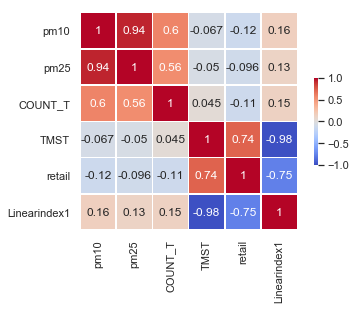

In [14]:
# 히트맵으로 상관계수 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Try 2

In [15]:
# 빈 리스트 만들기
totaldata2 = []

# for문 돌려서 각 파일 불러온 후 리스트에 append
for name in filenames:
    totaldata2.append(pd.read_csv('../data/total2/'+name))

# 최종적으로 concat
rawdata = pd.concat(totaldata2)

# 정규화
rawdata = (rawdata-rawdata.mean())/rawdata.std()

rawdata['search*count'] = rawdata['search']*rawdata['COUNT_T']
rawdata

,Date,search,pm10,pm25,COUNT_T,TMST,retail,search*count
0,-0.626874,0.151292,1.067992,0.426393,-0.634053,-0.587751,0.157128,-0.095927
1,-0.626122,0.151292,0.317234,-0.005862,0.324030,-0.539979,0.014601,0.049023
2,-0.625871,0.151292,1.444609,1.476300,-0.024364,-0.538089,0.239643,-0.003686
3,-0.625620,0.151292,-0.415653,-0.292727,-0.935547,-0.625753,0.047107,-0.141540
4,-0.625370,0.627826,-0.906737,-0.738795,-0.439756,-0.645439,0.429678,-0.276090
5,-0.625119,0.627826,0.969520,1.243480,0.786321,-0.569189,0.179632,0.493673
6,-0.624868,0.627826,0.829419,1.097752,0.518326,-0.546773,0.764741,0.325418
7,-0.624618,0.627826,-0.353313,-0.174361,0.216832,-0.565202,0.057109,0.136132
8,-0.624367,0.627826,-0.971186,-0.923289,-0.071263,-0.567184,0.107118,-0.044741
9,-0.624116,0.627826,-1.166906,-1.081776,-0.593854,-0.543533,0.292153,-0.372837


In [16]:
# x_feature와 y_feature 값 설정 
x3 = rawdata[['pm10','pm25','search*count','TMST']]
y3 =  rawdata['retail']
x_data3 = np.array(x3)
y_data3 = np.array(y3)
y_data3 = y_data3.reshape(-1, 1)
y_data3 = y_data3
x_data3 = x_data3

In [17]:
# session 클리어
K.clear_session()

# 모델 만들기
model3 = Sequential()
model3.add(Dense(input_dim=4, units=1, activation="linear"))

In [18]:
# 모델 학습
model3.compile(optimizer='adam', loss='mse')
model3.fit(x_data3,y_data3,batch_size=300, epochs=1000, verbose=1)

Epoch 1/1000
14404/14404 [==============================] - 0s 7us/step - loss: 4.5984
Epoch 2/1000
14404/14404 [==============================] - 0s 2us/step - loss: 4.1910
Epoch 3/1000
14404/14404 [==============================] - 0s 2us/step - loss: 3.8286
Epoch 4/1000
14404/14404 [==============================] - 0s 2us/step - loss: 3.5271
Epoch 5/1000
14404/14404 [==============================] - 0s 2us/step - loss: 3.2667
Epoch 6/1000
14404/14404 [==============================] - 0s 2us/step - loss: 3.0362
Epoch 7/1000
14404/14404 [==============================] - 0s 2us/step - loss: 2.8338
Epoch 8/1000
14404/14404 [==============================] - 0s 2us/step - loss: 2.6445
Epoch 9/1000
14404/14404 [==============================] - 0s 2us/step - loss: 2.4858
Epoch 10/1000
14404/14404 [==============================] - 0s 2us/step - loss: 2.3410
Epoch 11/1000
14404/14404 [==============================] - 0s 2us/step - loss: 2.2084
Epoch 12/1000
14404/14404 [==============

14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 186/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4481
Epoch 187/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 188/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 189/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4481
Epoch 190/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 191/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 192/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 193/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 194/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 195/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 196/1000
14404/14404 [========

14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 370/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 371/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 372/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 373/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 374/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 375/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 376/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4484
Epoch 377/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 378/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 379/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 380/1000
14404/14404 [========

Epoch 461/1000
14404/14404 [==============================] - ETA: 0s - loss: 0.668 - 0s 3us/step - loss: 0.4480
Epoch 462/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4485
Epoch 463/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 464/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 465/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 466/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 467/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4486
Epoch 468/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 469/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 470/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 471/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.44

14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 645/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 646/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 647/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 648/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 649/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 650/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 651/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 652/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 653/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 654/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 655/1000
14404/14404 [========

14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 829/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 830/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 831/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 832/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4481
Epoch 833/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4479
Epoch 834/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 835/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4479
Epoch 836/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 837/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4480
Epoch 838/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4480
Epoch 839/1000
14404/14404 [========

In [19]:
# 인덱스 도출
model3.predict(x_data3)

array([[-0.5286532 ],
       [-0.42911947],
       [-0.45908627],
       ...,
       [-0.58854693],
       [-0.5320343 ],
       [-0.55939645]], dtype=float32)

In [20]:
rawdata['Linearindex2'] = model3.predict(x_data3)

In [21]:
rawdata1 = rawdata[['pm10','pm25','search*count','TMST','retail','Linearindex2']]

# 직관적 분석을 위해 (-1) 곱하기 : 미세먼지와 인덱스를 양의 상관관계로 만드는 작업
rawdata1['Linearindex2'] = rawdata1['Linearindex2'] * (-1)
rawdata1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,pm10,pm25,search*count,TMST,retail,Linearindex2
0,1.067992,0.426393,-0.095927,-0.587751,0.157128,0.528653
1,0.317234,-0.005862,0.049023,-0.539979,0.014601,0.429119
2,1.444609,1.476300,-0.003686,-0.538089,0.239643,0.459086
3,-0.415653,-0.292727,-0.141540,-0.625753,0.047107,0.410598
4,-0.906737,-0.738795,-0.276090,-0.645439,0.429678,0.391343
5,0.969520,1.243480,0.493673,-0.569189,0.179632,0.446769
6,0.829419,1.097752,0.325418,-0.546773,0.764741,0.419339
7,-0.353313,-0.174361,0.136132,-0.565202,0.057109,0.371084
8,-0.971186,-0.923289,-0.044741,-0.567184,0.107118,0.345437
9,-1.166906,-1.081776,-0.372837,-0.543533,0.292153,0.306937


In [22]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,search*count,TMST,retail,Linearindex2
pm10,1.000000,0.942492,0.354077,-0.067030,-0.119640,0.161197
pm25,0.942492,1.000000,0.397981,-0.049735,-0.095586,0.129072
search*count,0.354077,0.397981,1.000000,-0.092214,-0.115170,0.155037
TMST,-0.067030,-0.049735,-0.092214,1.000000,0.738820,-0.994308
retail,-0.119640,-0.095586,-0.115170,0.738820,1.000000,-0.743058
Linearindex2,0.161197,0.129072,0.155037,-0.994308,-0.743058,1.000000


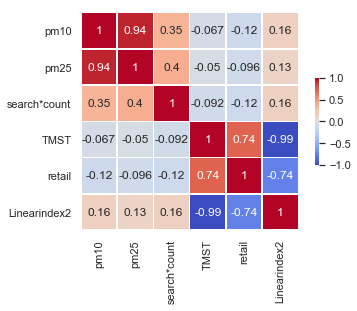

In [23]:
# 상관계수를 히트맵으로 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Try 3

In [24]:
# 빈 리스트 만들기
totaldata2 = []

# for문 돌려서 각 파일 불러온 후 리스트에 append
for name in filenames:
    totaldata2.append(pd.read_csv('../data/total2/'+name))

# 최종적으로 concat
rawdata = pd.concat(totaldata2)

# 정규화
rawdata = (rawdata-rawdata.mean())/rawdata.std()

rawdata['search*TMST'] = rawdata['search']*rawdata['TMST']
rawdata

,Date,search,pm10,pm25,COUNT_T,TMST,retail,search*TMST
0,-0.626874,0.151292,1.067992,0.426393,-0.634053,-0.587751,0.157128,-0.088922
1,-0.626122,0.151292,0.317234,-0.005862,0.324030,-0.539979,0.014601,-0.081694
2,-0.625871,0.151292,1.444609,1.476300,-0.024364,-0.538089,0.239643,-0.081408
3,-0.625620,0.151292,-0.415653,-0.292727,-0.935547,-0.625753,0.047107,-0.094671
4,-0.625370,0.627826,-0.906737,-0.738795,-0.439756,-0.645439,0.429678,-0.405223
5,-0.625119,0.627826,0.969520,1.243480,0.786321,-0.569189,0.179632,-0.357351
6,-0.624868,0.627826,0.829419,1.097752,0.518326,-0.546773,0.764741,-0.343278
7,-0.624618,0.627826,-0.353313,-0.174361,0.216832,-0.565202,0.057109,-0.354848
8,-0.624367,0.627826,-0.971186,-0.923289,-0.071263,-0.567184,0.107118,-0.356093
9,-0.624116,0.627826,-1.166906,-1.081776,-0.593854,-0.543533,0.292153,-0.341244


In [25]:
# x_feature와 y_feature 값 설정 
x4 = rawdata[['pm10','pm25','search*TMST','TMST']]
y4 =  rawdata['retail']
x_data4 = np.array(x4)
y_data4 = np.array(y4)
y_data4 = y_data4.reshape(-1, 1)
y_data4 = y_data4
x_data4 = x_data4

In [26]:
# session 클리어
K.clear_session()

# 모델 만들기
model4 = Sequential()
model4.add(Dense(input_dim=4, units=1, activation="linear"))

In [27]:
# 모델 학습
model4.compile(optimizer='adam', loss='mse')
model4.fit(x_data4,y_data4,batch_size=300, epochs=1000, verbose=1)

Epoch 1/1000
14404/14404 [==============================] - 0s 7us/step - loss: 0.7700
Epoch 2/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.6700
Epoch 3/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.5975
Epoch 4/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.5466
Epoch 5/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.5119
Epoch 6/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4884
Epoch 7/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4734
Epoch 8/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4641
Epoch 9/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4587
Epoch 10/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4553
Epoch 11/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4535
Epoch 12/1000
14404/14404 [==============

14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 94/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 95/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4487
Epoch 96/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 97/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 98/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 99/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 100/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 101/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 102/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 103/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 104/1000
14404/14404 [==============

14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 186/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4489
Epoch 187/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4489
Epoch 188/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 189/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 190/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 191/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 192/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 193/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 194/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 195/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4490
Epoch 196/1000
14404/14404 [========

14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 370/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4489
Epoch 371/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 372/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 373/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 374/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 375/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 376/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4489
Epoch 377/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4490
Epoch 378/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 379/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 380/1000
14404/14404 [========

Epoch 461/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 462/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 463/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 464/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 465/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4487
Epoch 466/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 467/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 468/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 469/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 470/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 471/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 472/1000
14404/

14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 644/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 645/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4492
Epoch 646/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 647/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 648/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4489
Epoch 649/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 650/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 651/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 652/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 653/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 654/1000
14404/14404 [========

14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 828/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 829/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 830/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 831/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 832/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4491
Epoch 833/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 834/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4489
Epoch 835/1000
14404/14404 [==============================] - 0s 2us/step - loss: 0.4488
Epoch 836/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 837/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4488
Epoch 838/1000
14404/14404 [========

In [28]:
# 인덱스 도출
model4.predict(x_data4)

array([[-0.54429644],
       [-0.43713853],
       [-0.49513015],
       ...,
       [-0.5699442 ],
       [-0.5439921 ],
       [-0.54911697]], dtype=float32)

In [29]:
rawdata['Linearindex3'] = model4.predict(x_data4)

In [30]:
rawdata1 = rawdata[['pm10','pm25','search*TMST','TMST','retail','Linearindex3']]

# 직관적 분석을 위해 (-1) 곱하기 : 미세먼지와 인덱스를 양의 상관관계로 만드는 작업
rawdata1['Linearindex3'] = rawdata1['Linearindex3'] * (-1)
rawdata1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,pm10,pm25,search*TMST,TMST,retail,Linearindex3
0,1.067992,0.426393,-0.088922,-0.587751,0.157128,0.544296
1,0.317234,-0.005862,-0.081694,-0.539979,0.014601,0.437139
2,1.444609,1.476300,-0.081408,-0.538089,0.239643,0.495130
3,-0.415653,-0.292727,-0.094671,-0.625753,0.047107,0.421596
4,-0.906737,-0.738795,-0.405223,-0.645439,0.429678,0.397897
5,0.969520,1.243480,-0.357351,-0.569189,0.179632,0.469396
6,0.829419,1.097752,-0.343278,-0.546773,0.764741,0.443351
7,-0.353313,-0.174361,-0.354848,-0.565202,0.057109,0.377917
8,-0.971186,-0.923289,-0.356093,-0.567184,0.107118,0.343099
9,-1.166906,-1.081776,-0.341244,-0.543533,0.292153,0.309672


In [31]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,search*TMST,TMST,retail,Linearindex3
pm10,1.000000,0.942492,-0.107802,-0.067030,-0.119640,0.166259
pm25,0.942492,1.000000,-0.141000,-0.049735,-0.095586,0.134550
search*TMST,-0.107802,-0.141000,1.000000,-0.514152,-0.372125,0.500750
TMST,-0.067030,-0.049735,-0.514152,1.000000,0.738820,-0.994651
retail,-0.119640,-0.095586,-0.372125,0.738820,1.000000,-0.742464
Linearindex3,0.166259,0.134550,0.500750,-0.994651,-0.742464,1.000000


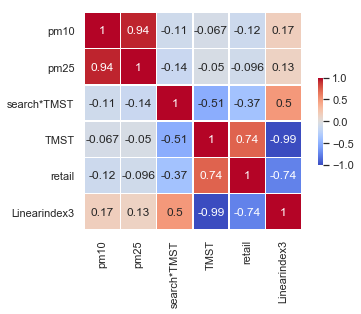

In [32]:
# 상관계수를 히트맵으로 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})